### Sprint 6. Algoritmes d’aprenentatge supervisat: Regressió

In [665]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

Carreguem el dataset i assignem els noms corresponents a les columnes.

In [13]:
data = pd.read_csv('housing data.csv')
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
data.shape

(505, 14)

Veiem quin tipus de dades son i una descripcio de cada variable:

In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    percentage of lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

Visualitzem la descripció de les dades del dataframe.

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### - Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

#### Model 1 : Simple Linear Regression

Primer provarem un model de regressió simple.

A continuació escollirem la característica que tingui una correlació més gran amb MEDV.
Per fer això visualitzarem la corelació de Pearson que ens dirà quina hem d'escollir.

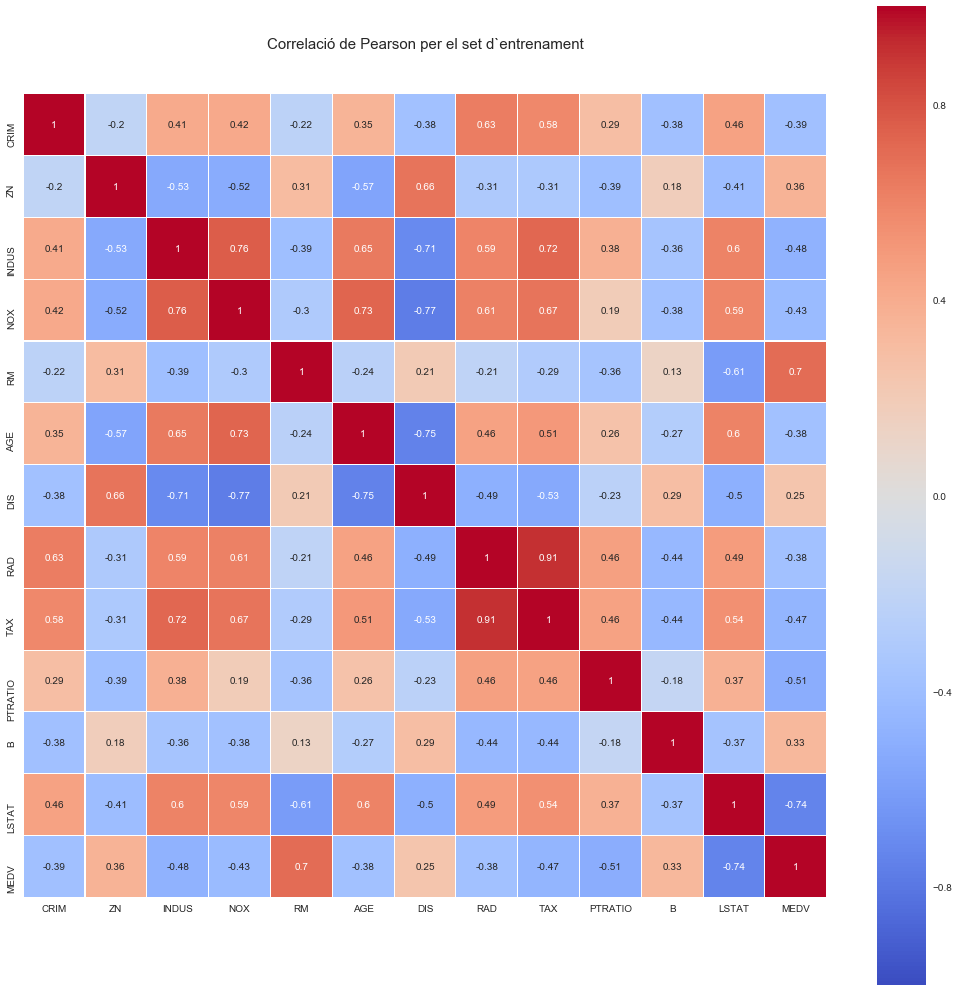

In [18]:
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize = (18,18))

sns.heatmap(data[cols].corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True)
plt.title('Correlació de Pearson per el set d`entrenament', y=1.05, size = 15); 

Veiem que LSTAT es la que presenta una correlació més forta, en aquest cas negativa. així doncs serà la que farem servir en el nostre model de regressió simple.

In [877]:
df_standard = data.copy()
standard_cols = ['LSTAT', 'MEDV']

standard_features = df_standard[standard_cols]
standard_features.head()

,LSTAT,MEDV
0,9.14,21.6
1,4.03,34.7
2,2.94,33.4
3,5.33,36.2
4,5.21,28.7


Farem un preprocessat de les dades mitjançant una estandarització.

In [878]:
scaler = StandardScaler().fit(standard_features.values)
standard_features = scaler.transform(standard_features.values)

In [879]:
df_standard[standard_cols] = standard_features
df_standard[standard_cols].head()

,LSTAT,MEDV
0,-0.494647,-0.101111
1,-1.211048,1.323287
2,-1.363862,1.181934
3,-1.028793,1.486386
4,-1.045617,0.670891


In [880]:
# Escollim la variable dependent.
y = df_standard['MEDV']
# Escollim la variable independent.
x = df_standard['LSTAT']

Ara visualitzarem la relació entre ambdues en una gràfica:

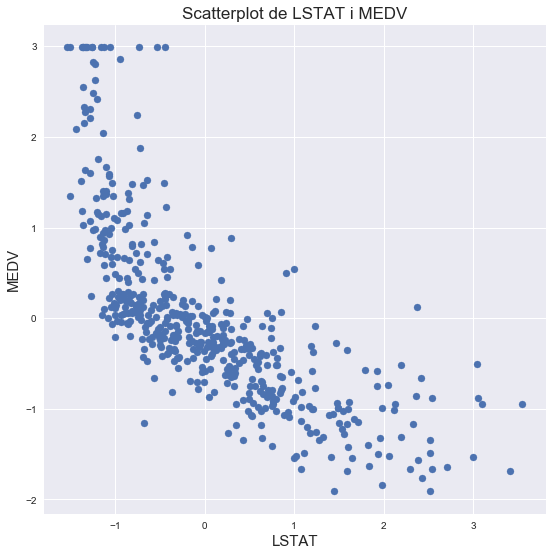

In [599]:
plt.figure(figsize = (9,9))
plt.scatter(x, y)
plt.title('Scatterplot de LSTAT i MEDV', fontsize = 17)
plt.xlabel('LSTAT',fontsize=15)
plt.ylabel('MEDV',fontsize=15); 

Veiem que la relació entre ambdues es aproximadament lineal.

In [881]:
# com que només té una característica fem un reshape abans de continuar.
x = x.values.reshape(-1, 1)
x.shape

(505, 1)

Dividim el dataset en un 80% de les dades per a entrenament i un 20% per a test.

In [882]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10)

A continuació farem la regressió.

In [883]:
simple_reg = LinearRegression()
simple_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Fem una funció per imprimir els resultats.

In [603]:
def print_results(true, predicted): 
    
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    print('R2 : ', r2_square)
    print('MSE: ', mse)

Ara farem les prediccions per el set de test i entrenament.

In [612]:
pred_train = simple_reg.predict(x_train)
pred_test = simple_reg.predict(x_test)

In [605]:
print('Resultats test:')
print_results(y_test, pred_test)
print('------------------------')
print('Resultats entrenament:')
print_results(y_train, pred_train)

Resultats test:
R2 :  0.524722328998
MSE:  0.455239551041
------------------------
Resultats entrenament:
R2 :  0.545061856927
MSE:  0.455133602966


Veiem que la R2 tant al set de test com al d'entrenament son força baixes i només aconsegueixen explicar el 52 i 54% respectivament de la variabilitat de MEDV.
Així doncs podem concloure que el model de regressió simple no seria un bon model per prediure els preus en aquest cas.
En quant al Mean Squared Error, com que lo que ens interessa es mantenir-ho lo més baix possible, i en aquest cas es força alt, ens reforça la idea de que aquest model està lluny de ser l'adequat per aquest cas.

A continuació farem una gràfica amb els resultats reals versus els resultats predits. En ella dibuixarem una linia de referencia que tallarà la gràfica en diagonal, de manera que com més a prop d'ella estiguin els punts més acurades seran les prediccions.

In [606]:
# fem un nou dataset per les predicciones del set de test i un altre pel d'entrenament.
pred_test = pd.DataFrame({'y_test': y_test, 'test_predictions' : pred_test})

pred_train = pd.DataFrame({'y_train' : y_train, 'train_predictions' : pred_train})

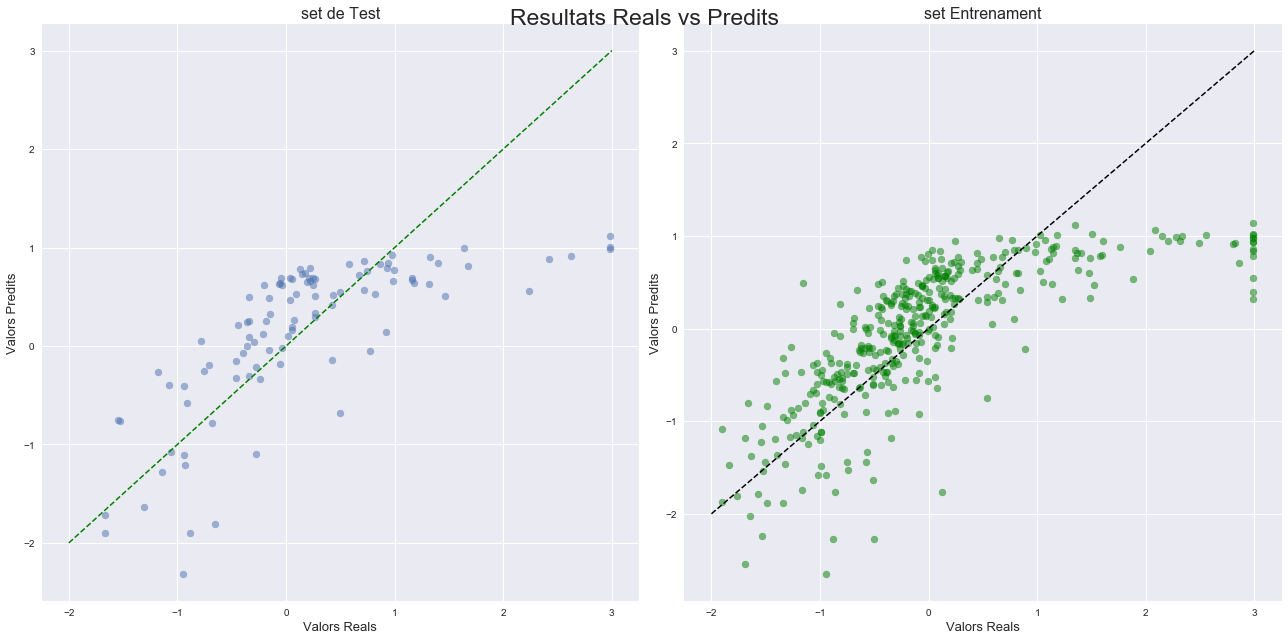

In [593]:
plt.figure(figsize = (18,9)) 
plt.suptitle('Resultats Reals vs Predits', fontsize = 23)

plt.subplot(121)
plt.scatter(x= pred_test['y_test'], y= pred_test['test_predictions'] , alpha = 0.5)
plt.plot([-2.0, 3], [-2.0, 3], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize= 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('set de Test', fontsize = 16)

plt.subplot(122)
plt.scatter(x=pred_train['y_train'], y = pred_train['train_predictions'], alpha = 0.5, c = 'green')
plt.plot([-2.0, 3], [-2.0, 3], color = 'black', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize = 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('set Entrenament', fontsize = 16)
plt.tight_layout(); 

En ambdues gràfiques podem veure que hi ha molts punts allunyats de la linia de referencia, tant en el set de test com en el d'entrenament, lo que només fa que confirmar lo que ja haviem vist abans, que aquest model no es adequat per fer una bona predicció dels preus de les vivendes(MEDV).

Finalment guardarem en un dataset el resultat del RM i MSE per l'exercici posterior.

In [614]:
results_df = pd.DataFrame(data = [['Simple Linear Regression',metrics.r2_score(y_test, pred_test), metrics.mean_squared_error(y_test, pred_test),metrics.r2_score(y_train, pred_train),metrics.mean_squared_error(y_train, pred_train)]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])

#### Model 2 : Random Forest Regression

Com que ja tenim el set d'entrenament i de test del model anterior, el farem servir aquest cop per al Random Forest Regressor.

en un principi deixarem tots els parametres per defecte i només tocarem el nombre d'arbres de decisió (n_estimators). Començarem per 10 a veure quin resultat ens dona.

In [897]:
# Divisió de les dades en train i test
# ==============================================================================
x_train, x_test, y_train, y_test = train_test_split(
                                        df_standard.drop("MEDV", axis=1),
                                        df_standard['MEDV'],
                                        test_size= 0.2,
                                        random_state = 10
                                    )
# Creació del model
# ==============================================================================
model = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = None
         )

# Entrenament del model
# ==============================================================================
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [898]:
forest_test_prediction = model.predict(x_test)
forest_train_prediction = model.predict(x_train)
print('Resultats test:')
print_results(y_test,forest_test_prediction )
print('------------------------')
print('Resultats entrenament:')
print_results(y_train, forest_train_prediction)

Resultats test:
R2 :  0.904406609697
MSE:  0.0915630898292
------------------------
Resultats entrenament:
R2 :  0.971388781262
MSE:  0.0286235112793


Veiem que la predicció ha millorat molt en comparació a la regressió lineal en tot dos sets.
En el set d'entrenament, el R2 ha passat del 54% fins a un 97%. I el MSE ha disminuit de manera considerable , de 45 a tan sols 2. Per un altre banda, en el set de test el R2 també ha millorat molt, de 52% a 90% i el MSE ha disminuit de fins 45 a 9. 

In [526]:
# fem un nou dataset per les predicciones del set de test i un altre pel d'entrenament.
forest_test_df = pd.DataFrame({'y_test': y_test, 'test_predictions' : forest_test_prediction})
forest_train_df = pd.DataFrame({'y_train' : y_train, 'train_predictions' : forest_train_prediction})

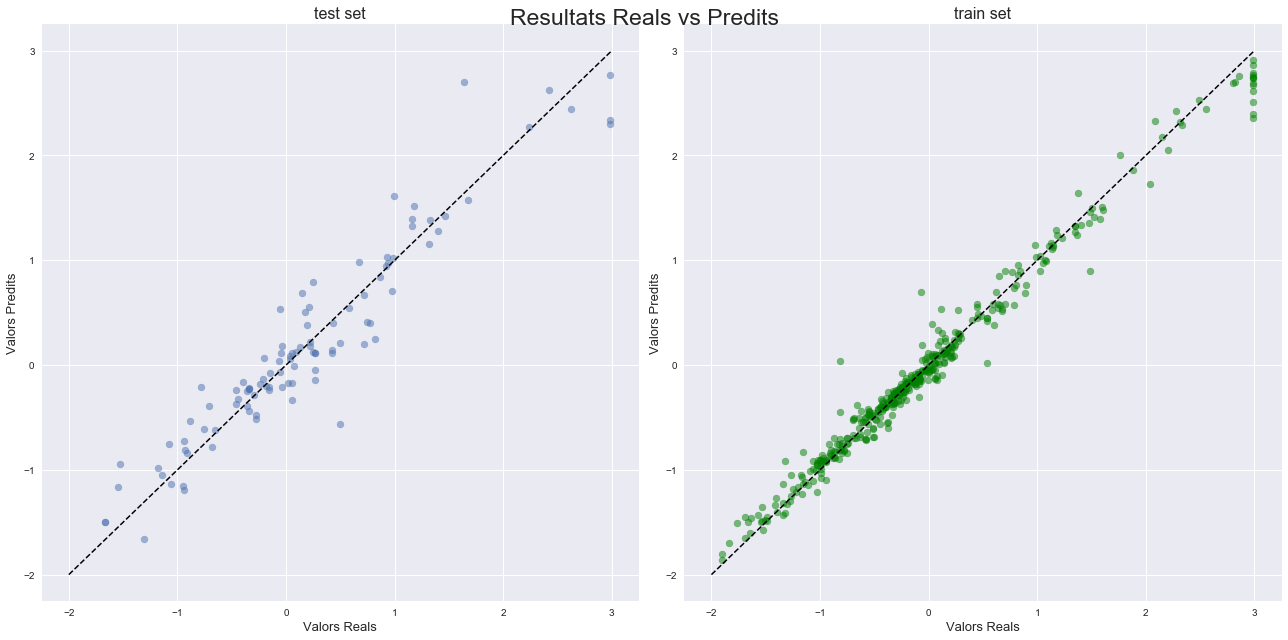

In [527]:
plt.figure(figsize= (18,9))
plt.suptitle('Resultats Reals vs Predits', fontsize = 23)

plt.subplot(121)
plt.scatter(x= forest_test_df['y_test'], y = forest_test_df['test_predictions'], alpha = 0.5)
plt.plot([-2.0, 3], [-2.0, 3], color = 'black', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize= 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x= forest_train_df['y_train'], y = forest_train_df['train_predictions'], alpha = 0.5, c = 'green')
plt.plot([-2.0, 3], [-2.0, 3], color = 'black', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize = 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('train set', fontsize = 16)
plt.tight_layout(); 

veiem que encara que millora força tots dos sets en relació al model de regressió lineal, és en el cas del set d'entrenament on la gràfica de dispersió coincideix en gran mesura amb la linia de referencia, per lo que les prediccions seran molt més acurades que en el model anterior.

Finalment guardem en un dataset el resultat del RM i MSE.

In [615]:
results_df2 = pd.DataFrame(data = [['Random Forest Regression',metrics.r2_score(y_test, forest_test_prediction), metrics.mean_squared_error(y_test, forest_test_prediction),metrics.r2_score(y_train, forest_train_prediction),metrics.mean_squared_error(y_train, forest_train_prediction)]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])

results_df = pd.concat([results_df, results_df2])

### - Exercici 2

Compara’ls en base al MSE i al R2 .

Ara compararem els dos models que hem fet en base al MSE i al R2.
Per això farem servir el dataframe on previament hem guardat aquesta informació.

In [616]:
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.524722,0.455240,0.545062,0.455134
0,Random Forest Regression,0.906557,0.089504,0.981009,0.018999


+ En la regressió simple com es pot veure l'R2 es força baix tant en el set de test com en el d'entrenament. I el MSE pel contrari és força alt. Entre ambdos sets hi ha molt poca diferencia en l'R2, de tan sols un 2% i el MSE es gairebé identic.
+ Si mirem el Random Forest, aquí veiem de primeres que hi ha més diferencia entre el set de test i el d'entrenament que no pas en el model de regressió lineal. Mentres que el d'entrenament arriba al 98% en l'R2, el de test es queda en un 90%. Lo mateix succeeix en el MSE. en el set d'entrenament es de tan sols 1 quan al de test puja fins a 8.

En resum. Clarament el model de regressió Random forest es molt més adequat per predir els preus dels habitatges que no pas el de regressió lineal.

In [617]:
results = results_df.set_index('Model')

Farem una gráfica a continuació per poder veure-ho d'un cop d'ull.
Primer compararem els resultats de la R2 en tots dos models.

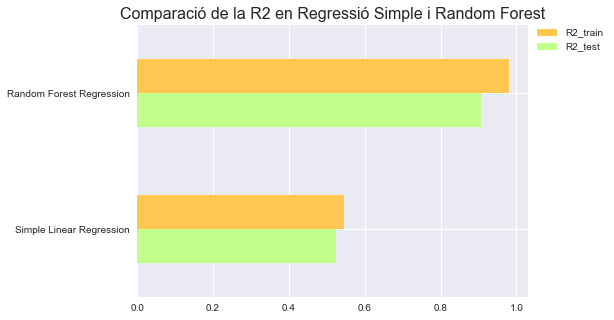

In [618]:
ax = results[['R2_test', 'R2_train']].plot(kind='barh', figsize=(7, 5), color = ['#c0ff89', '#ffc650'] )
ax.set_title('Comparació de la R2 en Regressió Simple i Random Forest', fontsize = 16)
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

En aquesta gràfica veiem clarament com l'R2 del model Random forest és clarament superior al model de regressió lineal.

Ara compararem gràficament el MSE entre ambdos models.

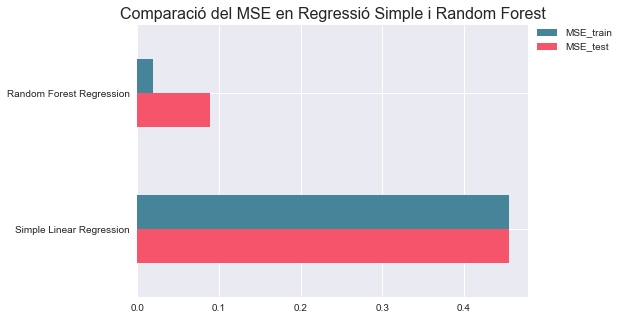

In [619]:
ax = results[['MSE_test', 'MSE_train']].plot(kind='barh', figsize=(7, 5), color = ['#f6546a', '#468499'] )
ax.set_title('Comparació del MSE en Regressió Simple i Random Forest', fontsize = 16)
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

Tornem a veure com el model Random forest presenta un MSE molt més baix que no pas el model de regressió lineal.

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

#### Simple Linear Regression

Podem veure els paràmetres que hem utilitzat en la regressió amb el mètode get_params()  i després canviarem un.

In [195]:
simple_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

Podem veure que el paràmetre 'fit_intercept' s'estableix en True per defecte. 

Tornem a fer la regressió lineal amb les dades originals no estandaritzades perque ens interessa en aquest cas veure el resultat de l'intercept amb els valor originals.

In [873]:
# Escollim la variable dependent.
y = data['MEDV']
# Escollim la variable independent.
x = data['LSTAT']
x = x.values.reshape(-1, 1)
x.shape
simple_reg = LinearRegression()
simple_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

El intercept és el valor previst de y quan X  és zero. En el nostre model l'intecept era:

In [874]:
simple_reg.intercept_

34.587442708618404

A la nostra regressió simple només hem utilitzat la característica LSTAT com a variable independent, això vol dir que quan LSTAT és igual a 0, el preu de la vivenda (MEDV) hauria de ser 34.58.

Ara comprovarem com canvia el nostre model si establim fit_intercep = False:

In [884]:
simple_reg_no_intercept = LinearRegression(fit_intercept= False)
simple_reg_no_intercept.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [885]:
# prediccions pel set de test
pred_test_no_intercept = simple_reg_no_intercept.predict(x_test)

# prediccions pel set d'entrenament
pred_train_no_intercept = simple_reg_no_intercept.predict(x_train)
print('Resultats test:')
print_results(y_test, pred_test_no_intercept)
print('Resultats entrenament:')
print_results(y_train, pred_train_no_intercept )

Resultats test:
R2 :  0.524882048431
MSE:  0.455086565518
Resultats entrenament:
R2 :  0.545042854395
MSE:  0.455152613662


Veiem que els resultats practicament no varien res respecte a la regressió lineal amb l'intercept, son gairebé identics.

guardarem aquestes dades en el nostre dataframe com hem fet anteriorment per poder fer una comparativa a posteriori.

In [620]:
results_df3 = pd.DataFrame(data = [['Simple Linear Regression no intercept',metrics.r2_score(y_test, pred_test_no_intercept ), metrics.mean_squared_error(y_test, pred_test_no_intercept ),metrics.r2_score(y_train, pred_train_no_intercept ),metrics.mean_squared_error(y_train, pred_train_no_intercept )]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])

results_df = pd.concat([results_df, results_df3])

#### Random Forest Regression

En l'exercici anterior ja hem modificat un dels paràmetres, el n_estimators. Ara canviarem un altre dels paràmetres importants del model Random Forest a veure si millora o es queda igual.

Mirem els parametres del Random Forest Regressor.

In [250]:
regressor.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 55,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

augmentar el nombre d'arbres acostuma a millorar el resultat, encara que arriba un moment que aquesta milora s'estanca i augmentar-lo només suposa augmentar la despesa computacional. així doncs la idea seria trobar el nombre ótim de n_estimators, perque el model sigui lo més eficient possible.

In [628]:
# Validació emprant el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valors evaluats
estimator_range = range(1, 150, 5)

# Bucle per entrenar un model amb cada valor de n_estimators i extreure el seu error d'entrenament i Out-of-Bag.

for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = None
             )
    modelo.fit(x_train, y_train)
    train_scores.append(modelo.score(x_train, y_train))
    oob_scores.append(modelo.oob_score_)
    

print(f"Valor òptim de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

Valor òptim de n_estimators: 126


In [629]:
# farem servir el valor òptim de 126 n_estimators.
regressor = RandomForestRegressor(n_estimators= 126, random_state= 10)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=126, n_jobs=1, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [630]:
forest_test_prediction = regressor.predict(x_test)
forest_train_prediction = regressor.predict(x_train)
print('Resultats test:')
print_results(y_test,forest_test_prediction )
print('------------------------')
print('Resultats entrenament:')
print_results(y_train, forest_train_prediction)

Resultats test:
R2 :  0.907027852832
MSE:  0.0890523605845
------------------------
Resultats entrenament:
R2 :  0.980740840971
MSE:  0.0192674335459


Veiem que en ajustar el nombre de n_estimators al número òptim l'R2 ha augmentat de 97% a  98% en el set d'entrenament i en el de test s'ha quedat gairebé igual.
Al mateix temps també ha millorat el MSE baixant-lo de 2 a 1 en el cas del set d'entrenament i de 9 a 8 en el de test. 

guardem els resultats en el nostre dataframe.

In [631]:
results_df4 = pd.DataFrame(data = [['Random Forest n_estimators',metrics.r2_score(y_test, forest_test_prediction), metrics.mean_squared_error(y_test, forest_test_prediction),metrics.r2_score(y_train, forest_train_prediction),metrics.mean_squared_error(y_train, forest_train_prediction)]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])

results_df = pd.concat([results_df, results_df4])

En aquest cas canviarem el parametre max_features, que és un dels més importants, doncs permet controlar quan es decorrelacionen els arbres entre si. 
Per saber quin seria el número óptim que hauriem d'escollir farem com en el cas dels n_estimators per calcular-lo.

In [757]:
# Validació emprant el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valors evaluats
max_features_range = range(1, x_train.shape[1] + 1, 1)

# Bucle per entrenar un model amb cada valor de n_estimators i extreure el seu error d'entrenament i Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 126,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = None
             )
    modelo.fit(x_train, y_train)
    train_scores.append(modelo.score(x_train, y_train))
    oob_scores.append(modelo.oob_score_)
    

print(f"Valor òptim de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor òptim de max_features: 9


In [825]:
regressor_changed = RandomForestRegressor(n_estimators = 126, max_features = 9, random_state=None)
regressor_changed.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=126, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [635]:
forest_changed_test_prediction = regressor_changed.predict(x_test)
forest_changed_train_prediction = regressor_changed.predict(x_train)

print_results(y_test, forest_changed_test_prediction)
print_results(y_train, forest_changed_train_prediction)

R2 :  0.911035455368
MSE:  0.0852137220571
R2 :  0.981191467415
MSE:  0.0188166134937


Veiem que la millora es gairebé imperceptible al set d'entrenament i només millora lleuregament al set de test de 90% a 91%. Així doncs en aquest cas el paràmetre max_features no ens ajudaria gaire a millorar el nostre model.

In [636]:
results_df5 = pd.DataFrame(data = [['Random Forest max_features',metrics.r2_score(y_test, forest_changed_test_prediction), metrics.mean_squared_error(y_test, forest_changed_test_prediction),metrics.r2_score(y_train, forest_changed_train_prediction),metrics.mean_squared_error(y_train, forest_changed_train_prediction)]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])

results_df = pd.concat([results_df, results_df5])

In [637]:
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.524722,0.455240,0.545062,0.455134
0,Random Forest Regression,0.906557,0.089504,0.981009,0.018999
0,Simple Linear Regression no intercept,0.524882,0.455087,0.545043,0.455153
0,Random Forest n_estimators,0.907028,0.089052,0.980741,0.019267
0,Random Forest max_features,0.911035,0.085214,0.981191,0.018817


### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

Emprarem el Cross-Validation en els models que hem fet per evaluar el seu rendiment.

#### Simple Linear Regression 

In [845]:
r2_slr_cv_train = cross_val_score(simple_reg, x_train, y_train, cv = 10, scoring = 'r2')
r2_slr_cv_train.mean()

0.51986106357712292

In [846]:
mse_slr_cv_train = cross_val_score(simple_reg, x_train, y_train, cv = 10 , scoring = 'neg_mean_squared_error')
abs(mse_slr_cv_train.mean())

0.46163931861383228

In [847]:
r2_slr_cv_test = cross_val_score(simple_reg, x_test, y_test, cv = 10, scoring = 'r2')
r2_slr_cv_test.mean()

0.41173617633216786

In [848]:
mse_slr_cv_test = cross_val_score(simple_reg, x_test, y_test, cv = 10 , scoring = 'neg_mean_squared_error')
abs(mse_slr_cv_test.mean())

0.47451648169442961

In [849]:
cv_slr_train = pd.DataFrame(data = [['Simple Linear Regression Train', r2_slr_cv_train.mean(), abs(mse_slr_cv_train.mean())]], columns = ['Model', 'R2', 'MSE'])
cv_slr_test = pd.DataFrame(data = [['Simple Linear Regression Test', r2_slr_cv_test.mean(), abs(mse_slr_cv_test.mean())]], columns = ['Model', 'R2', 'MSE'])
results_df = pd.concat([cv_slr_train, cv_slr_test])

In [850]:
results_df

,Model,R2,MSE
0,Simple Linear Regression Train,0.519861,0.461639
0,Simple Linear Regression Test,0.411736,0.474516


#### Random Forest Regression 

In [826]:
forest_r2_train = cross_val_score(regressor_changed, x_train, y_train, cv = 10, scoring ='r2')

In [830]:
forest_r2_train.mean()

0.86659841680513539

In [828]:
forest_r2_test = cross_val_score(regressor_changed, x_test, y_test, cv = 10, scoring ='r2')

In [829]:
forest_r2_test.mean()

0.79072687115979223

In [788]:
forest_mse_train = cross_val_score(regressor_changed, x_train, y_train, cv =10,  scoring = 'neg_mean_squared_error')

In [834]:
abs(forest_mse_train.mean())

0.13409127807234808

In [780]:
forest_mse_test = cross_val_score(regressor_changed, x_test, y_test, cv =10,  scoring = 'mean_squared_error')

In [833]:
abs(forest_mse_test.mean())

0.15459146528435816

In [837]:
cv_slr_train = pd.DataFrame(data = [['Random Forest Train', forest_r2_train.mean(), abs(forest_mse_train.mean())]], columns = ['Model', 'R2', 'MSE'])
cv_slr_test = pd.DataFrame(data = [['Random Forest Test', forest_r2_test.mean(), abs(forest_mse_test.mean())]], columns = ['Model', 'R2', 'MSE'])
results_df = pd.concat([cv_slr_train, cv_slr_test])

In [838]:
results_df

,Model,R2,MSE
0,Random Forest Train,0.866598,0.134091
0,Random Forest Test,0.790727,0.154591


Veiem que després de fer la cross validation el model de random forest encara continua oferint molt millor resultat que no pas la regressió lineal. 
Així doncs a l'hora d'escollir entre tots dos models seria clarament el més adient.

### - Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l'hora de fer prediccions.

Al model de regressió lineal no hem fet servir el nombre d'habitacions (RM) així que només farem un nou model amb el Random Forest, treient el RM, a veure quin resultat ens dona en relació amb el model que si ho incorpora.

In [801]:
# Divisió de les dades en train i test
# ==============================================================================
x_train, x_test, y_train, y_test = train_test_split(
                                        df_standard.drop("RM", axis=1),
                                        df_standard['RM'],
                                        test_size= 0.2,
                                        random_state = 10
                                    )
# Creació del model
# ==============================================================================
model = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = None
         )

# Entrenament del model
# ==============================================================================
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [802]:
forest_test_prediction = model.predict(x_test)
forest_train_prediction = model.predict(x_train)
print('Resultats test:')
print_results(y_test,forest_test_prediction )
print('------------------------')
print('Resultats entrenament:')
print_results(y_train, forest_train_prediction)

Resultats test:
R2 :  0.716565875463
MSE:  0.138788412673
------------------------
Resultats entrenament:
R2 :  0.908233979687
MSE:  0.0451382730446


In [803]:
# fem un nou dataset per les predicciones del set de test i un altre pel d'entrenament.
forest_test_df = pd.DataFrame({'y_test': y_test, 'test_predictions' : forest_test_prediction})
forest_train_df = pd.DataFrame({'y_train' : y_train, 'train_predictions' : forest_train_prediction})

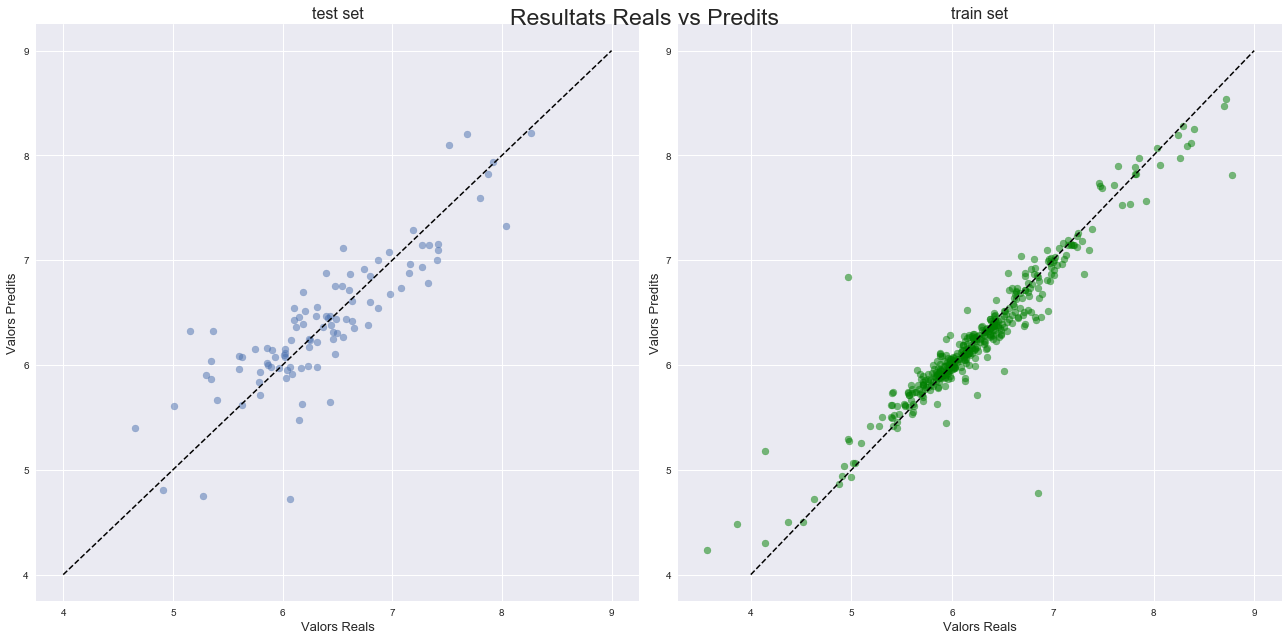

In [809]:
plt.figure(figsize= (18,9))
plt.suptitle('Resultats Reals vs Predits', fontsize = 23)

plt.subplot(121)
plt.scatter(x= forest_test_df['y_test'], y = forest_test_df['test_predictions'], alpha = 0.5)
plt.plot([4, 9], [4, 9], color = 'black', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize= 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x= forest_train_df['y_train'], y = forest_train_df['train_predictions'], alpha = 0.5, c = 'green')
plt.plot([4, 9], [4, 9], color = 'black', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Valors Reals', fontsize = 13)
plt.ylabel('Valors Predits', fontsize = 13)
plt.title('train set', fontsize = 16)
plt.tight_layout(); 

Veiem que si treiem del random forest el nombre d'habitacions (RM) això empitjora les prediccions i augmenta l'error en relació al model de regressió que si incloeix aquest característica, com es pot comprovar tant a la gràfica com a la taula de resultats que es mostra a continuació.

In [807]:
results_df6 = pd.DataFrame(data = [['Random Forest Regression_No_RM',metrics.r2_score(y_test, forest_test_prediction), metrics.mean_squared_error(y_test, forest_test_prediction),metrics.r2_score(y_train, forest_train_prediction),metrics.mean_squared_error(y_train, forest_train_prediction)]], columns = ['Model', 'R2_test','MSE_test','R2_train','MSE_train'])
results_df = pd.concat([results_df2, results_df6])

In [808]:
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Random Forest Regression,0.906557,0.089504,0.981009,0.018999
0,Random Forest Regression_No_RM,0.716566,0.138788,0.908234,0.045138
